# Banking Data Analysis

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

%matplotlib inline

## Data Understanding And Cleaning

In [11]:
df = pd.read_csv("Datasets/transactions_data.csv")

In [12]:
df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB


In [4]:
df.isnull().sum()

id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,id,client_id,card_id,merchant_id,zip,mcc
count,1.330592e+07,1.330592e+07,1.330592e+07,1.330592e+07,1.165321e+07,1.330592e+07
mean,1.558402e+07,1.026812e+03,3.475268e+03,4.772376e+04,5.132782e+04,5.565440e+03
std,4.704499e+06,5.816386e+02,1.674356e+03,2.581534e+04,2.940423e+04,8.757002e+02
min,7.475327e+06,0.000000e+00,0.000000e+00,1.000000e+00,1.001000e+03,1.711000e+03
25%,1.150604e+07,5.190000e+02,2.413000e+03,2.588700e+04,2.860200e+04,5.300000e+03
50%,1.557087e+07,1.070000e+03,3.584000e+03,4.592600e+04,4.767000e+04,5.499000e+03
75%,1.965361e+07,1.531000e+03,4.901000e+03,6.757000e+04,7.790100e+04,5.812000e+03
max,2.376187e+07,1.998000e+03,6.144000e+03,1.003420e+05,9.992800e+04,9.402000e+03


In [7]:
df.drop(columns=['errors'],inplace = True)

In [8]:
df['merchant_state'].fillna('Unknown', inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16976\3961698296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['merchant_state'].fillna('Unknown', inplace=True)


In [9]:
df['zip'].fillna(0, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16976\3884127042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['zip'].fillna(0, inplace=True)


In [13]:
df.isnull().sum()

id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64

In [14]:
df['date'] = pd.to_datetime(df['date'])

In [16]:
df['amount'] = df['amount'].replace('[^\d.]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_16976\2080190587.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['amount'] = df['amount'].replace('[^\d.]', '', regex=True).astype(float)


In [17]:
df.dtypes

id                         int64
date              datetime64[ns]
client_id                  int64
card_id                    int64
amount                   float64
use_chip                  object
merchant_id                int64
merchant_city             object
merchant_state            object
zip                      float64
mcc                        int64
errors                    object
dtype: object

## EDA Process

### 1. Transaction Trends Over Time

#### Top Merchants by High-Value Transaction Volume

In [18]:
top_merchants = df.groupby('merchant_id')['amount'].sum().sort_values(ascending = False).head(10)
print(top_merchants)

merchant_id
27092    53158515.64
59935    35712266.95
61195    29152617.55
43293    21371156.52
60569    18900017.57
22204    17771512.68
39021    15725426.31
73186    11664842.01
20561     8995673.10
26810     8866018.36
Name: amount, dtype: float64


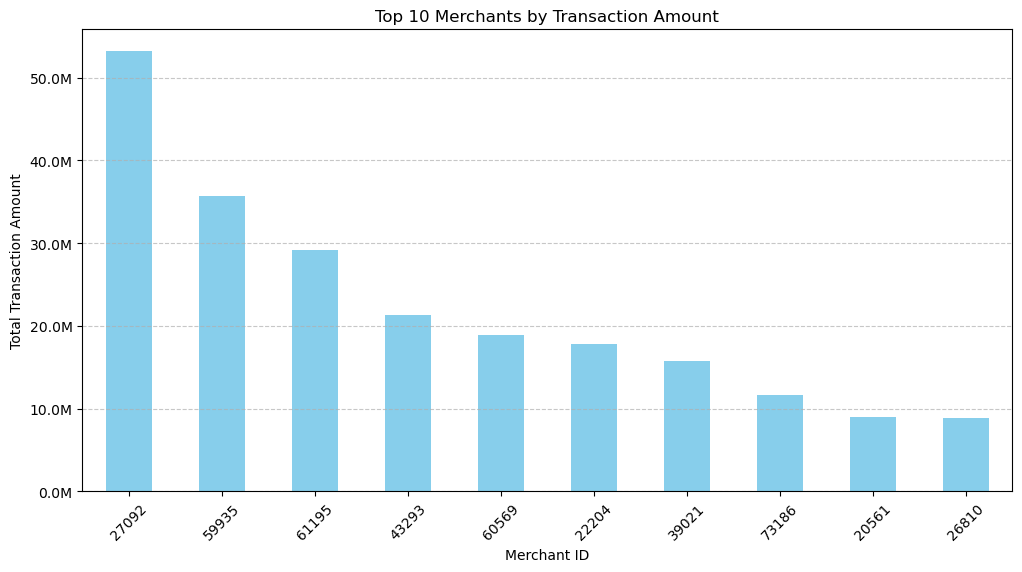

In [19]:
plt.figure(figsize=(12,6))
top_merchants.plot(kind = 'bar', color = 'skyblue')

plt.xlabel("Merchant ID")
plt.ylabel("Total Transaction Amount")
plt.title("Top 10 Merchants by Transaction Amount")

plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle = '--', alpha = 0.7)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

#### Monthly & Yearly High-Value Transaction Trends

In [98]:
df.set_index('date', inplace=True)

df_daily = df.groupby('date')['amount'].sum()
df_monthly = df_daily.resample('ME').sum()
df_yearly = df_daily.resample('YE').sum()

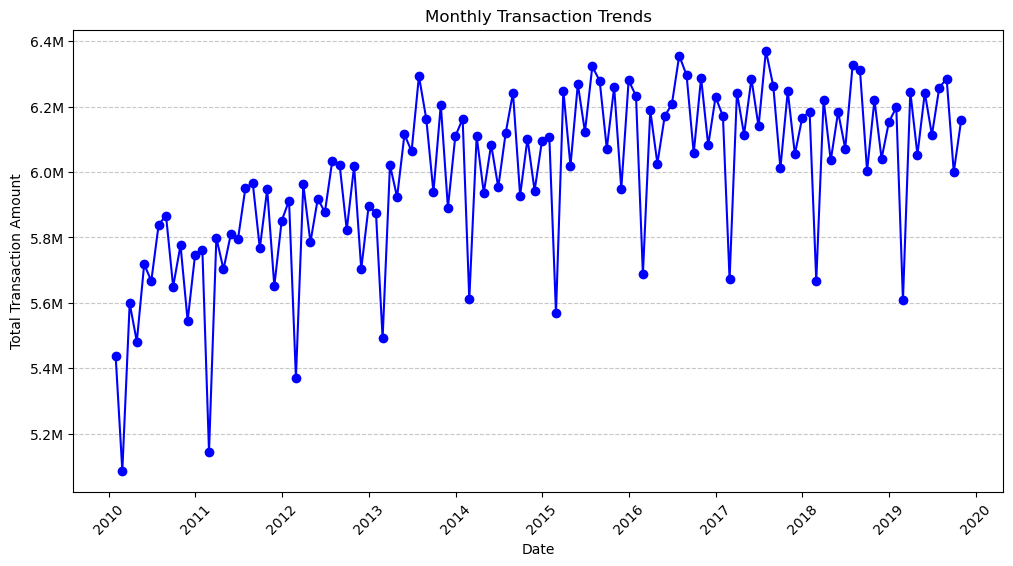

In [101]:
plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly.values, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.title('Monthly Transaction Trends')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

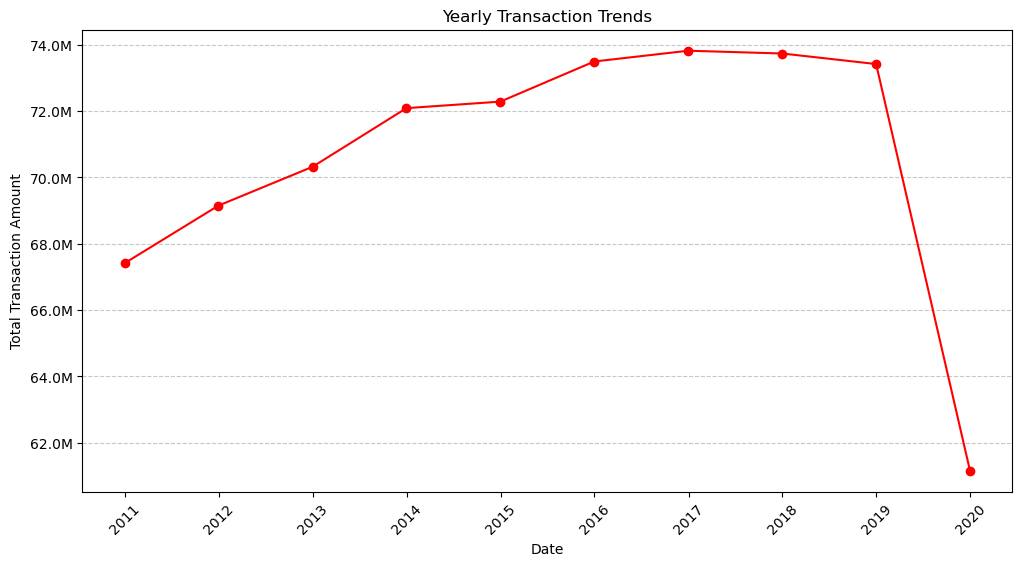

In [102]:
plt.figure(figsize=(12,6))
plt.plot(df_yearly.index, df_yearly.values, marker='o', linestyle='-', color='r')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.title('Yearly Transaction Trends')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

##### February Drop

In [25]:
df_feb_yearly = df[df['date'].dt.month == 2].groupby(df['date'].dt.year)['amount'].sum()
df_jan_yearly = df[df['date'].dt.month == 1].groupby(df['date'].dt.year)['amount'].sum()

In [26]:
df_feb_vs_jan = pd.DataFrame({'January': df_jan_yearly, 'February': df_feb_yearly})
df_feb_vs_jan['Drop (%)'] = ((df_feb_vs_jan['January'] - df_feb_vs_jan['February']) / df_feb_vs_jan['January']) * 100

In [30]:
print(df_feb_vs_jan)

         January    February   Drop (%)
date                                   
2010  5436364.54  5087372.24   6.419590
2011  5763113.88  5145667.25  10.713768
2012  5912696.53  5369738.65   9.182915
2013  5875754.23  5491956.06   6.531896
2014  6162216.68  5611490.39   8.937146
2015  6107488.74  5568017.68   8.832944
2016  6232212.82  5687548.74   8.739497
2017  6170508.64  5671650.84   8.084549
2018  6184339.65  5666444.41   8.374301
2019  6197033.84  5607746.73   9.509180


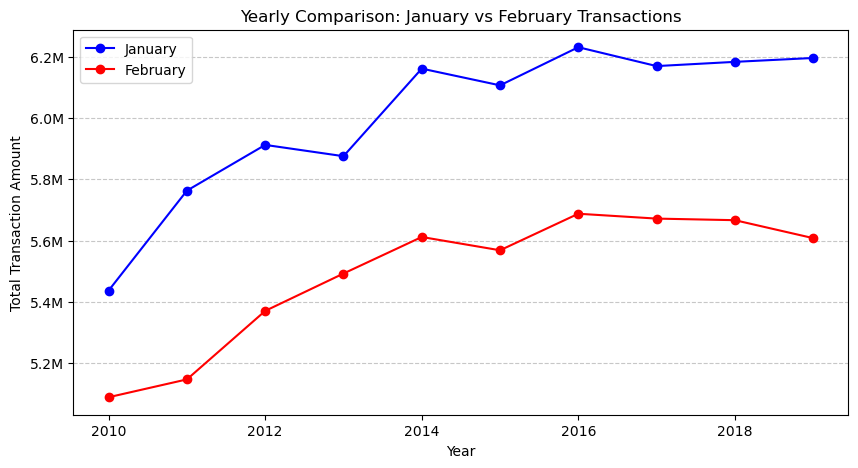

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(df_feb_vs_jan.index, df_feb_vs_jan['January'], marker='o', linestyle='-', color='b', label='January')
plt.plot(df_feb_vs_jan.index, df_feb_vs_jan['February'], marker='o', linestyle='-', color='r', label='February')

plt.xlabel('Year')
plt.ylabel('Total Transaction Amount')
plt.title('Yearly Comparison: January vs February Transactions')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

##### July Hike

In [31]:
df_june_yearly = df[df['date'].dt.month == 6].groupby(df['date'].dt.year)['amount'].sum()
df_july_yearly = df[df['date'].dt.month == 7].groupby(df['date'].dt.year)['amount'].sum()

In [35]:
df_july_vs_june = pd.DataFrame({'June': df_june_yearly, 'July': df_july_yearly})
df_july_vs_june['Hike (%)'] = ((df_july_vs_june['July'] - df_july_vs_june['June']) / df_july_vs_june['June']) * 100

In [36]:
print(df_july_vs_june)

            June        July  Hike (%)
date                                  
2010  5667037.19  5839209.73  3.038140
2011  5794905.80  5949919.65  2.675002
2012  5877139.05  6033859.82  2.666617
2013  6063155.80  6293064.66  3.791901
2014  5953249.51  6118053.53  2.768304
2015  6122383.18  6322404.50  3.267050
2016  6207149.07  6355670.67  2.392751
2017  6139157.90  6370436.56  3.767270
2018  6071532.68  6325808.89  4.188007
2019  6112985.14  6257765.69  2.368410


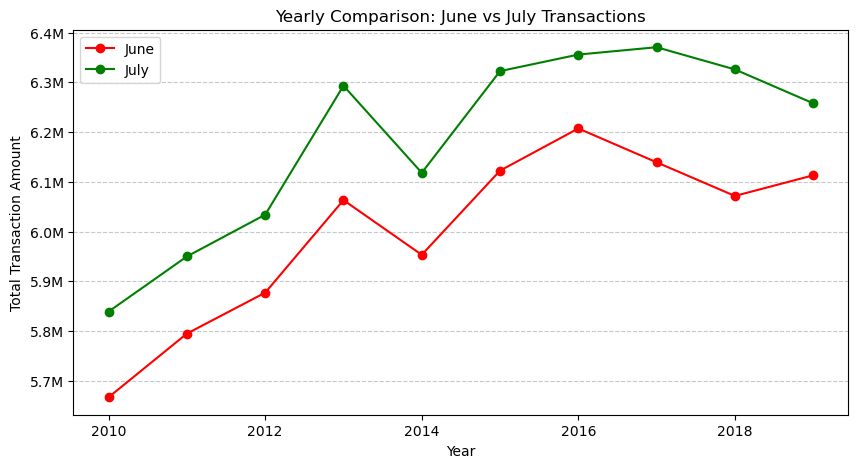

In [67]:
plt.figure(figsize=(10, 5))
plt.plot(df_july_vs_june.index, df_july_vs_june['June'], marker='o', linestyle='-', color='r', label='June')
plt.plot(df_july_vs_june.index, df_july_vs_june['July'], marker='o', linestyle='-', color='g', label='July')

plt.xlabel('Year')
plt.ylabel('Total Transaction Amount')
plt.title('Yearly Comparison: June vs July Transactions')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

##### November Drop

In [42]:
df_nov_yearly = df[df['date'].dt.month == 11].groupby(df['date'].dt.year)['amount'].sum()
df_oct_yearly = df[df['date'].dt.month == 10].groupby(df['date'].dt.year)['amount'].sum()

In [47]:
df_nov_vs_oct = pd.DataFrame({'October': df_oct_yearly, 'November': df_nov_yearly})
df_nov_vs_oct['Drop (%)'] = ((df_nov_vs_oct['October'] - df_nov_vs_oct['November']) / df_nov_vs_oct['October']) * 100

In [48]:
print(df_nov_vs_oct)

         October    November  Drop (%)
date                                  
2010  5776385.08  5545814.81  3.991601
2011  5946875.77  5651700.51  4.963535
2012  6018075.07  5703198.63  5.232179
2013  6205741.13  5890592.34  5.078343
2014  6101821.94  5943087.05  2.601434
2015  6259250.67  5948463.42  4.965247
2016  6287625.36  6081218.71  3.282744
2017  6246976.46  6054039.43  3.088487
2018  6220037.58  6040642.53  2.884147
2019  6157816.28         NaN       NaN


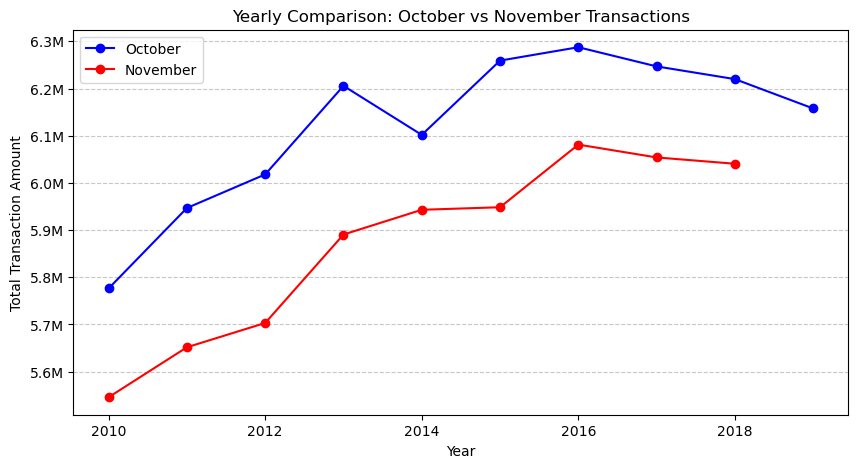

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(df_nov_vs_oct.index, df_nov_vs_oct['October'], marker='o', linestyle='-', color='b', label='October')
plt.plot(df_nov_vs_oct.index, df_nov_vs_oct['November'], marker='o', linestyle='-', color='r', label='November')

plt.xlabel('Year')
plt.ylabel('Total Transaction Amount')
plt.title('Yearly Comparison: October vs November Transactions')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

#### Merchant-Level Drop Analysis(November & Februray)

##### 95 Percentile Threshold

In [56]:
high_value_threshold = df['amount'].quantile(0.95)

df_high_value = df[df['amount']> high_value_threshold]

print(f"High-Value Transaction Threshold: {high_value_threshold}")
print(f"Total High-Value Transactions: {df_high_value.shape[0]}")

df_high_value.head()

High-Value Transaction Threshold: 154.1
Total High-Value Transactions: 665222


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
8,7475336,2010-01-01 00:21:00,335,5131,261.58,Online Transaction,50292,ONLINE,NaN,NaN,7801,NaN
28,7475358,2010-01-01 00:48:00,401,3004,669.88,Swipe Transaction,68977,West Covina,CA,91791.0,3174,NaN
35,7475365,2010-01-01 01:01:00,820,127,270.22,Online Transaction,73186,ONLINE,NaN,NaN,4814,NaN
44,7475376,2010-01-01 01:19:00,989,2511,580.98,Swipe Transaction,73661,Thackerville,OK,73459.0,7995,NaN


##### Monthly Trend of High-Value Transactions

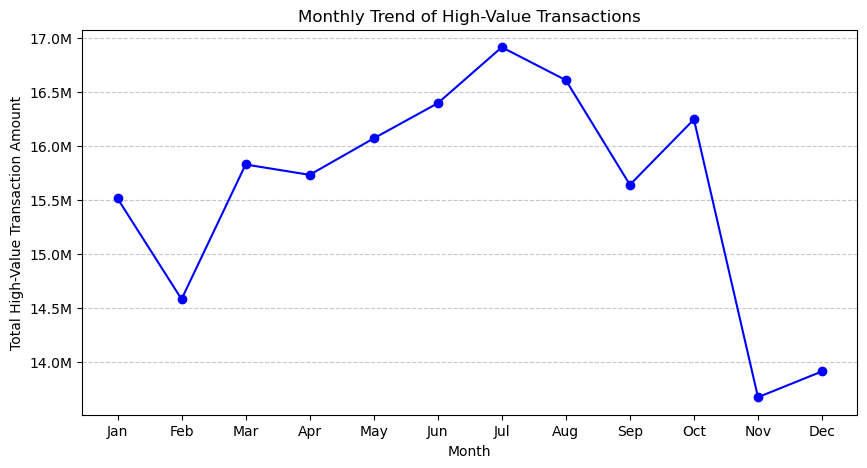

In [69]:
df_high_value['year'] = df_high_value['date'].dt.year
df_high_value['month'] = df_high_value['date'].dt.month

monthly_trend = df_high_value.groupby('month')['amount'].sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Total High-Value Transaction Amount')
plt.title('Monthly Trend of High-Value Transactions')
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

##### Yearly Trend of High-Value Transactions

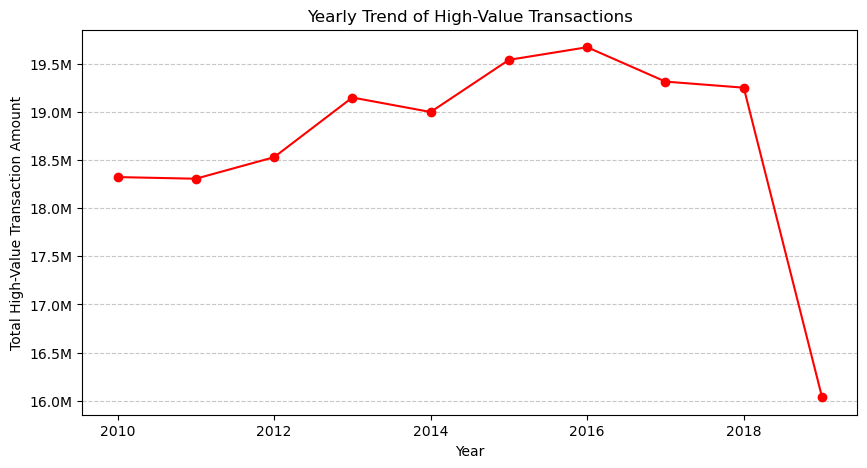

In [70]:
yearly_trend = df_high_value.groupby('year')['amount'].sum()

plt.figure(figsize=(10,5))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Total High-Value Transaction Amount')
plt.title('Yearly Trend of High-Value Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

##### Top 10 Merchants Driving July Spike

C:\Users\DELL\AppData\Local\Temp\ipykernel_16976\1639279301.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=july_merchants.index, y=july_merchants.values, palette='coolwarm')


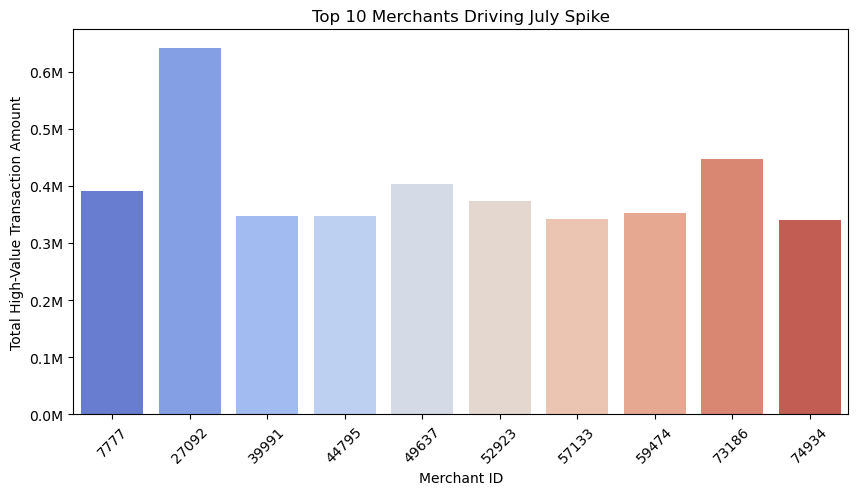

In [71]:
df_july = df_high_value[df_high_value['month'] == 7]

july_merchants = df_july.groupby('merchant_id')['amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=july_merchants.index, y=july_merchants.values, palette='coolwarm')
plt.xlabel('Merchant ID')
plt.ylabel('Total High-Value Transaction Amount')
plt.title('Top 10 Merchants Driving July Spike')
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

##### Number of High-Value Transactions Each Month

C:\Users\DELL\AppData\Local\Temp\ipykernel_16976\509410837.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='Reds')


([<matplotlib.axis.XTick at 0x2278ee0e510>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

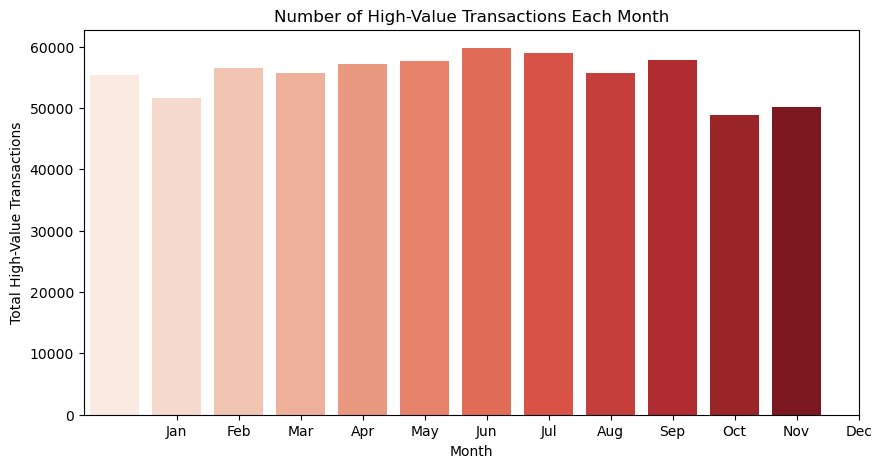

In [75]:
df_november = df_high_value[df_high_value['month'] == 11]

monthly_counts = df_high_value.groupby('month').size()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='Reds')
plt.xlabel('Month')
plt.ylabel('Total High-Value Transactions')
plt.title('Number of High-Value Transactions Each Month')
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

##### Comparison of Top 10 Merchants in July vs. November & February

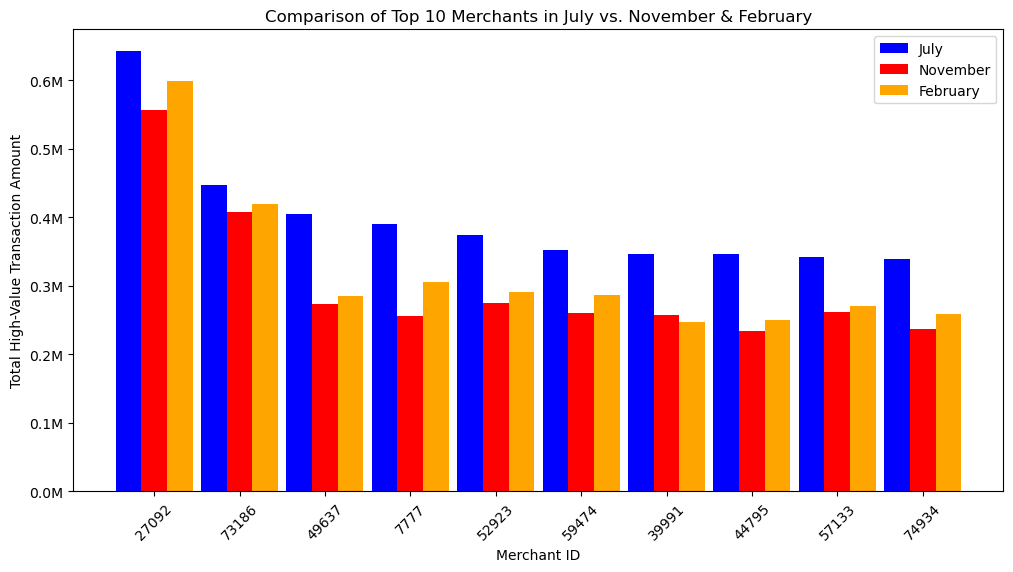

In [73]:
july_merchants = df_high_value[df_high_value['month'] == 7].groupby('merchant_id')['amount'].sum()
nov_merchants = df_high_value[df_high_value['month'] == 11].groupby('merchant_id')['amount'].sum()
feb_merchants = df_high_value[df_high_value['month'] == 2].groupby('merchant_id')['amount'].sum()

top_merchants = july_merchants.sort_values(ascending=False).head(10).index

nov_top_merchants = nov_merchants[top_merchants]
feb_top_merchants = feb_merchants[top_merchants]

plt.figure(figsize=(12, 6))
x = range(len(top_merchants))

plt.bar(x, july_merchants[top_merchants], width=0.3, label='July', color='blue')
plt.bar([i + 0.3 for i in x], nov_top_merchants, width=0.3, label='November', color='red')
plt.bar([i + 0.6 for i in x], feb_top_merchants, width=0.3, label='February', color='orange')

plt.xlabel("Merchant ID")
plt.ylabel("Total High-Value Transaction Amount")
plt.title("Comparison of Top 10 Merchants in July vs. November & February")
plt.xticks([i + 0.3 for i in x], top_merchants, rotation=45)
plt.legend()

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

#### Transaction Type Analysis

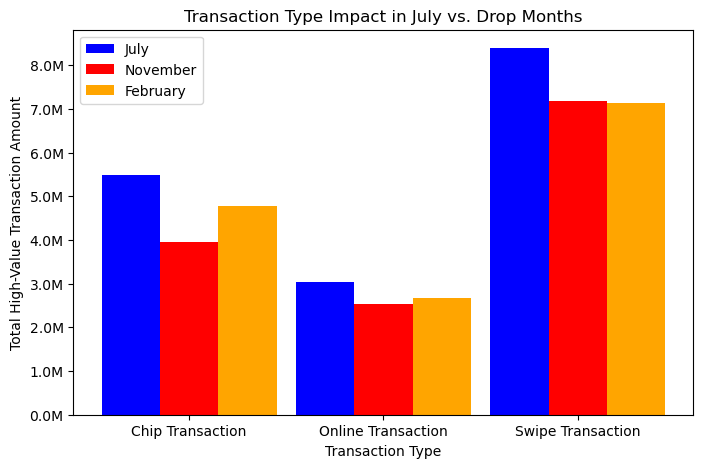

In [74]:
df_high_value = df_high_value.copy() 
df_high_value.loc[:, 'month'] = df_high_value['date'].dt.month

months = {7: "July", 11: "November", 2: "February"}

txn_data = {
    month: df_high_value[df_high_value['month'] == month].groupby('use_chip')['amount'].sum()
    for month in months.keys()
}

txn_df = pd.DataFrame(txn_data).fillna(0)

plt.figure(figsize=(8, 5))
x = np.arange(len(txn_df.index))

plt.bar(x, txn_df[7], width=0.3, label='July', color='blue')
plt.bar(x + 0.3, txn_df[11], width=0.3, label='November', color='red')
plt.bar(x + 0.6, txn_df[2], width=0.3, label='February', color='orange')

plt.xlabel("Transaction Type")
plt.ylabel("Total High-Value Transaction Amount")
plt.title("Transaction Type Impact in July vs. Drop Months")
plt.xticks(x + 0.3, txn_df.index)
plt.legend()

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

#### Top 10 Clients by Transaction Volume

In [78]:
top_clients = df.groupby('client_id')['amount'].sum().sort_values(ascending = False).head(10)

print(top_clients)

client_id
96      3558461.05
1888    3140434.28
1098    3037892.26
1168    2642306.75
909     2469976.96
1776    2407078.75
208     2263347.70
1686    2257622.90
1340    2169131.23
840     2102686.86
Name: amount, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_16976\568004871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clients.index,y=top_clients.values,palette='Blues_r')


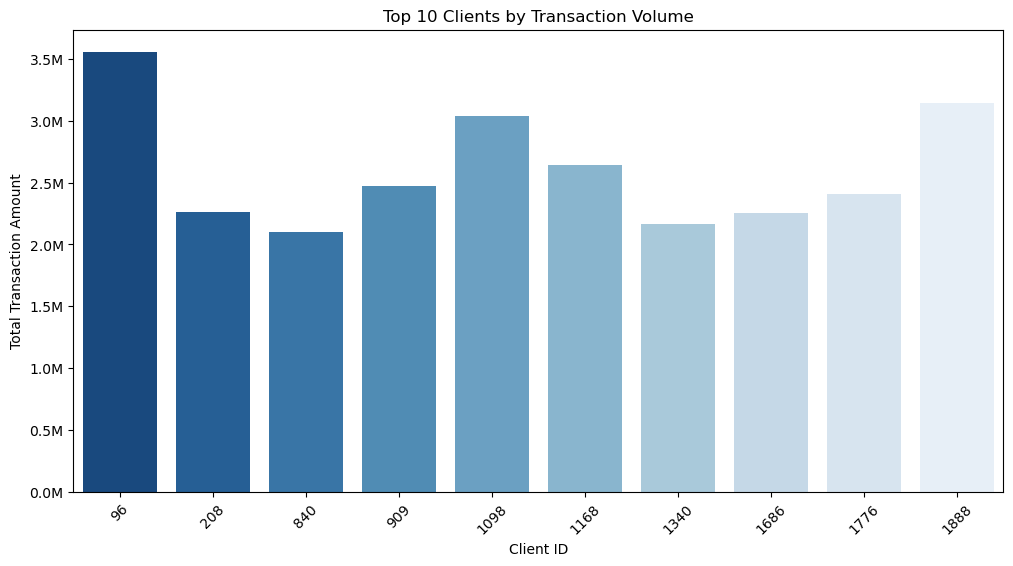

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_clients.index,y=top_clients.values,palette='Blues_r')

plt.xlabel('Client ID')
plt.ylabel('Total Transaction Amount')
plt.title('Top 10 Clients by Transaction Volume')
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

#### Unique Cards per Client

In [80]:
top_clients_cards = df[df['client_id'].isin(top_clients.index)].groupby('client_id')['card_id'].nunique()

print(top_clients_cards)

client_id
96      4
208     2
840     6
909     5
1098    4
1168    1
1340    5
1686    3
1776    2
1888    3
Name: card_id, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_16976\2068866306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clients_cards.index, y=top_clients_cards.values, palette='Reds_r')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '96'),
  Text(1, 0, '208'),
  Text(2, 0, '840'),
  Text(3, 0, '909'),
  Text(4, 0, '1098'),
  Text(5, 0, '1168'),
  Text(6, 0, '1340'),
  Text(7, 0, '1686'),
  Text(8, 0, '1776'),
  Text(9, 0, '1888')])

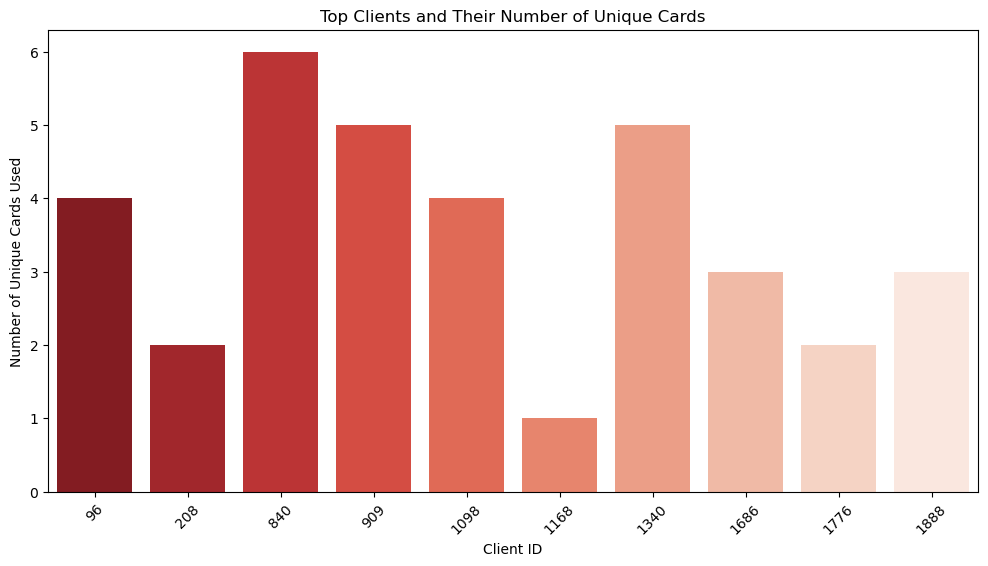

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_clients_cards.index, y=top_clients_cards.values, palette='Reds_r')

plt.xlabel('Client ID')
plt.ylabel('Number of Unique Cards Used')
plt.title('Top Clients and Their Number of Unique Cards')
plt.xticks(rotation=45)

#### Transaction Type Breakdown for Top Clients

In [82]:
top_clients_txn = df[df['client_id'].isin(top_clients.index)]

txn_types = top_clients_txn.groupby(['client_id','use_chip'])['amount'].count().unstack().fillna(0)

print(txn_types)

use_chip   Chip Transaction  Online Transaction  Swipe Transaction
client_id                                                         
96                    14428                 963              23226
208                   12949                2398              15127
840                    6328                 829               7938
909                   17904                4017              21460
1098                  23725                 398              24356
1168                  12285                4643              13592
1340                   6334                 849              14840
1686                   7831                 939              11040
1776                  14987               10149              16214
1888                  18881                 483              20741


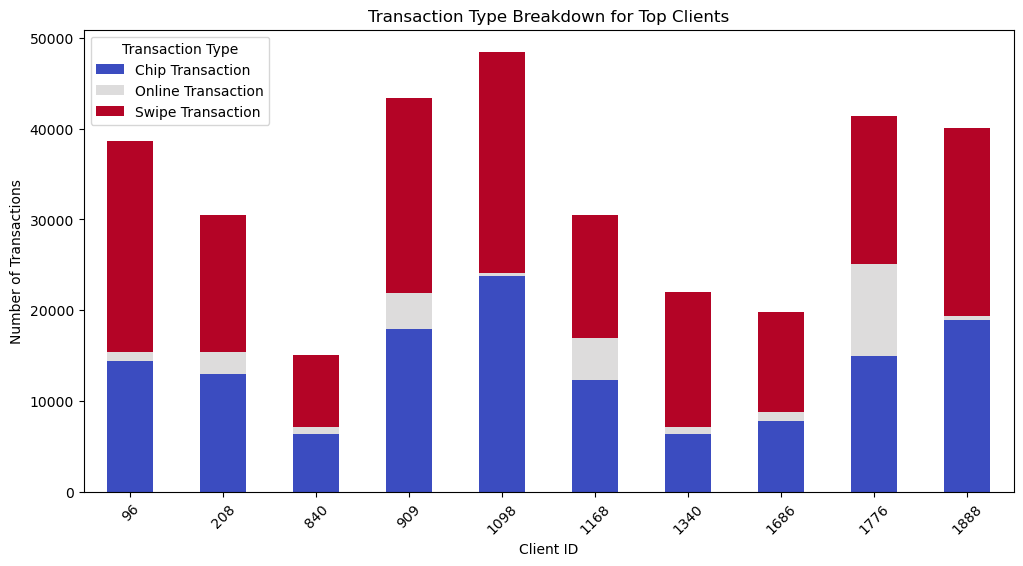

In [83]:
txn_types.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

plt.xlabel('Client ID')
plt.ylabel('Number of Transactions')
plt.title('Transaction Type Breakdown for Top Clients')
plt.xticks(rotation=45)
plt.legend(title='Transaction Type')

### 2. High Risk Client Analysis

#### Thresholding Online Transactions

In [84]:
txn_type_counts = df.groupby(['client_id', 'use_chip'])['amount'].sum().unstack().fillna(0)

txn_type_counts.columns = ['Chip Transaction', 'Swipe Transaction', 'Online Transaction']  # Adjust if needed

print(txn_type_counts.head())

           Chip Transaction  Swipe Transaction  Online Transaction
client_id                                                         
0                 329248.89           90290.19           361380.59
1                  23959.55           92186.82           251775.00
2                 124085.54           41320.41           206954.32
3                  78187.05           31025.29           183723.12
4                 262920.38           62213.68           405718.30


In [85]:
txn_type_counts['Online Ratio'] = txn_type_counts['Online Transaction'] / (
    txn_type_counts['Chip Transaction'] + txn_type_counts['Swipe Transaction'] + txn_type_counts['Online Transaction']
)

print(txn_type_counts[['Online Transaction', 'Online Ratio']].head())

           Online Transaction  Online Ratio
client_id                                  
0                   361380.59      0.462763
1                   251775.00      0.684317
2                   206954.32      0.555791
3                   183723.12      0.627180
4                   405718.30      0.555130


In [86]:
overall_online_ratio = txn_type_counts['Online Transaction'].sum() / (
    txn_type_counts['Chip Transaction'].sum() + txn_type_counts['Swipe Transaction'].sum() + txn_type_counts['Online Transaction'].sum()
)

threshold = 1.5 * overall_online_ratio

txn_type_counts['High Online Risk'] = txn_type_counts['Online Ratio'] > threshold

print(txn_type_counts[txn_type_counts['High Online Risk']][['Online Transaction', 'Online Ratio', 'High Online Risk']])

           Online Transaction  Online Ratio  High Online Risk
client_id                                                    
107                 205462.51      0.878690              True
229                 510563.23      0.890557              True
237                 333617.51      0.850248              True
244                 275625.83      0.877325              True
282                 237259.46      0.815354              True
293                 325623.46      0.805341              True
320                 361641.27      0.888590              True
361                 364144.58      0.859199              True
363                 475697.73      0.862011              True
369                 833756.77      0.814158              True
387                  84568.00      0.786450              True
410                  98227.27      0.777652              True
430                 979837.69      0.824412              True
524                 280283.37      0.918109              True
737     

In [87]:
high_risk_clients = txn_type_counts[txn_type_counts['High Online Risk']].sort_values(by='Online Ratio', ascending=False)

In [89]:
high_risk_summary = {
    "Total High-Risk Clients": txn_type_counts["High Online Risk"].sum(),
    "Average Online Transaction Ratio (High-Risk)": high_risk_clients["Online Ratio"].mean(),
    "Maximum Online Transaction Ratio": high_risk_clients["Online Ratio"].max(),
    "Minimum Online Transaction Ratio": high_risk_clients["Online Ratio"].min(),
    "Overall Online Transaction Ratio": overall_online_ratio,
    "Threshold Used": threshold,
}

for key, value in high_risk_summary.items():
    print(f"{key}: {value}")

print("\nTop High-Risk Clients Based on Online Ratio:")
print(high_risk_clients[['Online Transaction', 'Online Ratio']].head(10))

Total High-Risk Clients: 44
Average Online Transaction Ratio (High-Risk): 0.8550502438271028
Maximum Online Transaction Ratio: 0.9772118257058242
Minimum Online Transaction Ratio: 0.7776522514501524
Overall Online Transaction Ratio: 0.5182719075982289
Threshold Used: 0.7774078613973434

Top High-Risk Clients Based on Online Ratio:
           Online Transaction  Online Ratio
client_id                                  
1459                884431.26      0.977212
1812               1033698.29      0.939504
1072                517759.35      0.923270
1672                 79498.76      0.919532
524                 280283.37      0.918109
1765                541710.94      0.916113
1497                452506.75      0.912049
737                 693221.91      0.909994
1923                394250.04      0.908660
1957                287759.31      0.904942


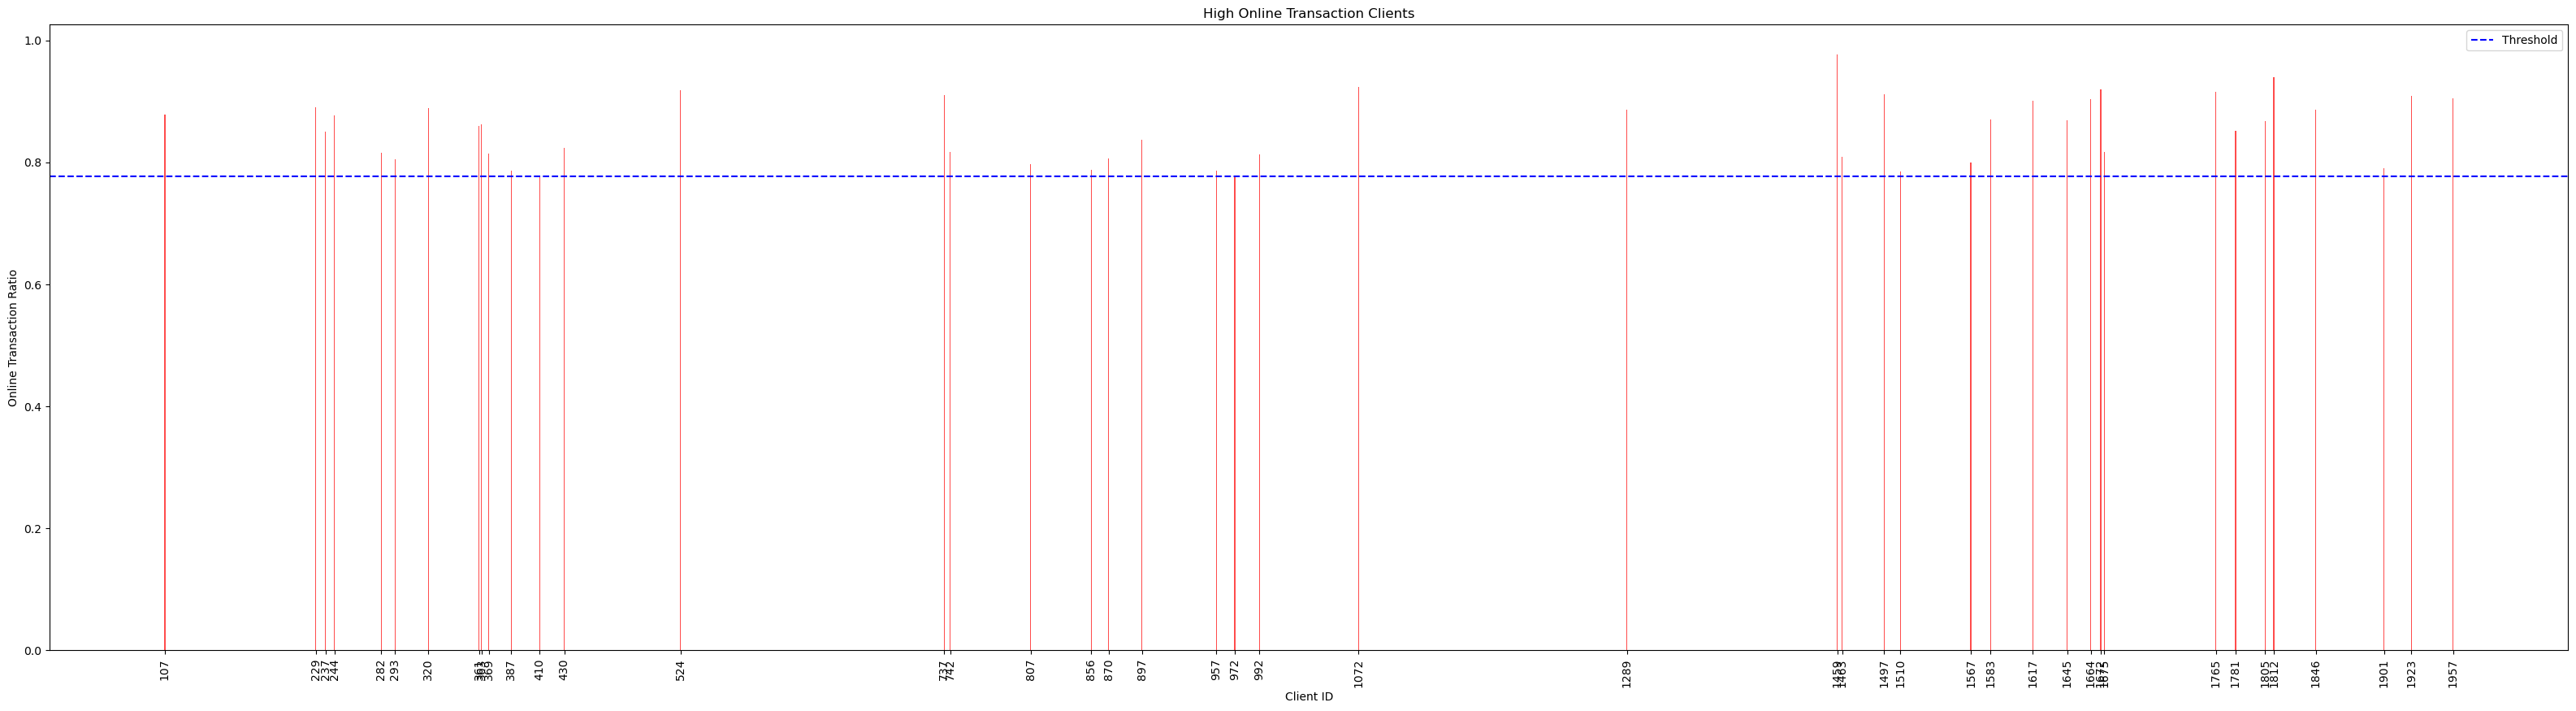

In [88]:
plt.figure(figsize=(40,10))

plt.bar(high_risk_clients.index, high_risk_clients['Online Ratio'], color='red', alpha=0.7)

plt.xlabel('Client ID')
plt.ylabel('Online Transaction Ratio')
plt.title('High Online Transaction Clients')

plt.xticks(ticks=high_risk_clients.index, labels=high_risk_clients.index, rotation=90, ha='center', fontsize=10)

plt.axhline(y=threshold, color='blue', linestyle='--', label='Threshold')
plt.legend()

#### Client Risk Categorization

High-Risk Clients (>70% Online Transactions): [1194, 1558, 1684]
Moderate-Risk Clients (50%-70% Online Transactions): [38, 94, 135, 301, 305, 327, 1127, 1156, 1169, 1198, 1256, 1263, 1330, 1425, 1448, 1808, 1910]
    client_id            use_chip  risk_flag
0        1556   Swipe Transaction   Low Risk
1         561   Swipe Transaction   Low Risk
2        1129   Swipe Transaction   Low Risk
3         430   Swipe Transaction   Low Risk
4         848   Swipe Transaction   Low Risk
5        1807   Swipe Transaction   Low Risk
6        1556   Swipe Transaction   Low Risk
7        1684  Online Transaction  High Risk
8         335  Online Transaction   Low Risk
9         351   Swipe Transaction   Low Risk
10        554   Swipe Transaction   Low Risk
11        605   Swipe Transaction   Low Risk
12       1556   Swipe Transaction   Low Risk
13       1797   Swipe Transaction   Low Risk
14        114   Swipe Transaction   Low Risk
15       1634   Swipe Transaction   Low Risk
16        646   Swipe 

C:\Users\DELL\AppData\Local\Temp\ipykernel_16976\3045680363.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['risk_flag'], palette="coolwarm", order=['Low Risk', 'Moderate Risk', 'High Risk'])


Text(0.5, 1.0, 'Client Risk Distribution')

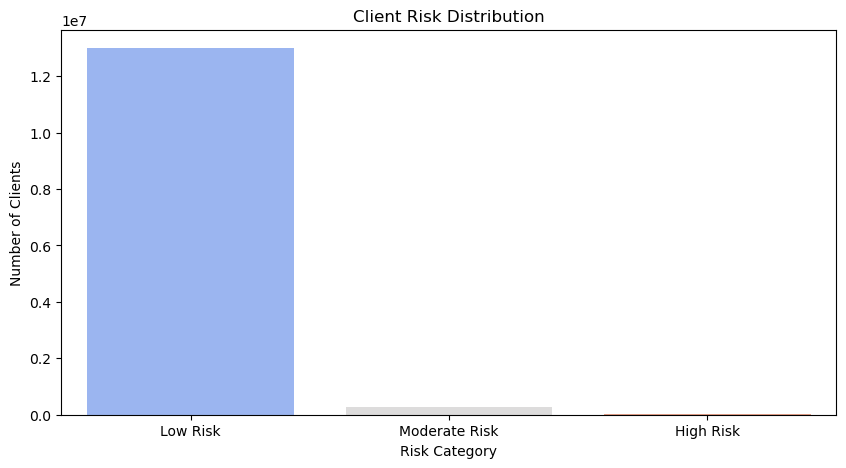

In [90]:
online_txn_ratio = df.groupby('client_id')['use_chip'].apply(lambda x: (x == "Online Transaction").mean())

high_risk_clients = online_txn_ratio[online_txn_ratio > 0.7].index
moderate_risk_clients = online_txn_ratio[(online_txn_ratio >= 0.5) & (online_txn_ratio <= 0.7)].index

print(f"High-Risk Clients (>70% Online Transactions): {list(high_risk_clients)}")
print(f"Moderate-Risk Clients (50%-70% Online Transactions): {list(moderate_risk_clients)}")

df['risk_flag'] = df['client_id'].apply(
    lambda x: 'High Risk' if x in high_risk_clients else 
              ('Moderate Risk' if x in moderate_risk_clients else 'Low Risk')
)

print(df[['client_id', 'use_chip', 'risk_flag']].head(20))

plt.figure(figsize=(10, 5))
sns.countplot(x=df['risk_flag'], palette="coolwarm", order=['Low Risk', 'Moderate Risk', 'High Risk'])
plt.xlabel("Risk Category")
plt.ylabel("Number of Clients")
plt.title("Client Risk Distribution")

##### Average Transaction Amount of High Risk and Moderate Risk Clients

In [91]:
high_risk_txn = df[df['client_id'].isin(high_risk_clients)]
moderate_risk_txn = df[df['client_id'].isin(moderate_risk_clients)]

print("High-Risk Clients - Average Transaction Amount:")
print(high_risk_txn.groupby('client_id')['amount'].mean().sort_values(ascending=False))

print("\nModerate-Risk Clients - Average Transaction Amount:")
print(moderate_risk_txn.groupby('client_id')['amount'].mean().sort_values(ascending=False))

High-Risk Clients - Average Transaction Amount:
client_id
1558    69.380849
1194    41.071839
1684    34.943598
Name: amount, dtype: float64

Moderate-Risk Clients - Average Transaction Amount:
client_id
1156    94.952359
135     55.730116
1263    51.743562
327     47.100547
38      46.666262
1169    46.531218
1330    46.516886
1808    45.999982
94      44.951222
1198    42.883505
1448    42.241852
1425    40.778906
1256    38.774573
301     37.210644
1910    37.142769
1127    37.081840
305     26.467655
Name: amount, dtype: float64


#### Merchant Risk Evaluation

In [92]:
merchant_counts = df.groupby(['client_id', 'merchant_id']).size().reset_index(name='count')

print("\nTop High-Risk Clients Buying from Same Merchant Frequently:")
print(merchant_counts[merchant_counts['client_id'].isin(high_risk_clients)].sort_values(by='count', ascending=False).head(10))

print("\nTop Moderate-Risk Clients Buying from Same Merchant Frequently:")
print(merchant_counts[merchant_counts['client_id'].isin(moderate_risk_clients)].sort_values(by='count', ascending=False).head(10))


Top High-Risk Clients Buying from Same Merchant Frequently:
        client_id  merchant_id  count
297735       1684        39021   9890
206127       1194        39021   9817
274304       1558        39021   9704
206141       1194        50867    743
297712       1684        26810    737
297742       1684        43293    719
206132       1194        43293    708
206104       1194        27092    544
274308       1558        41526    345
274329       1558        50867    298

Top Moderate-Risk Clients Buying from Same Merchant Frequently:
        client_id  merchant_id  count
207027       1198        41122  10390
25342         135        39021  10087
231062       1330        15143  10073
55740         327        39021  10056
252500       1448        39021   9924
201709       1169        41122   9923
218912       1256        39021   9902
247341       1425        39021   6646
17320          94        39021   6525
52831         301        39021   6431


#### Monthly Spending Pattern of High-Risk Clients

In [95]:
df['transaction_date'] = pd.to_datetime(df['date'])
spending_trends = df.groupby(['client_id', df['transaction_date'].dt.month])['amount'].sum().unstack()

print("\n Monthly Spending Trends for High-Risk Clients:")
print(spending_trends.loc[high_risk_clients].fillna(0))


 Monthly Spending Trends for High-Risk Clients:
transaction_date        1         2         3         4         5         6   \
client_id                                                                      
1194              47648.35  46733.51  56966.74  49821.08  51760.23  48296.61   
1558              82123.82  71815.15  77829.55  75963.24  77761.73  79315.31   
1684              36135.24  39489.56  44992.69  39505.26  44782.11  43804.73   

transaction_date        7         8         9         10        11        12  
client_id                                                                     
1194              54032.05  57315.63  52844.06  53745.56  41185.79  42297.48  
1558              82736.35  80780.21  81245.31  82413.50  68404.91  73962.82  
1684              41590.39  40868.57  40458.68  43730.98  35144.01  38218.94  


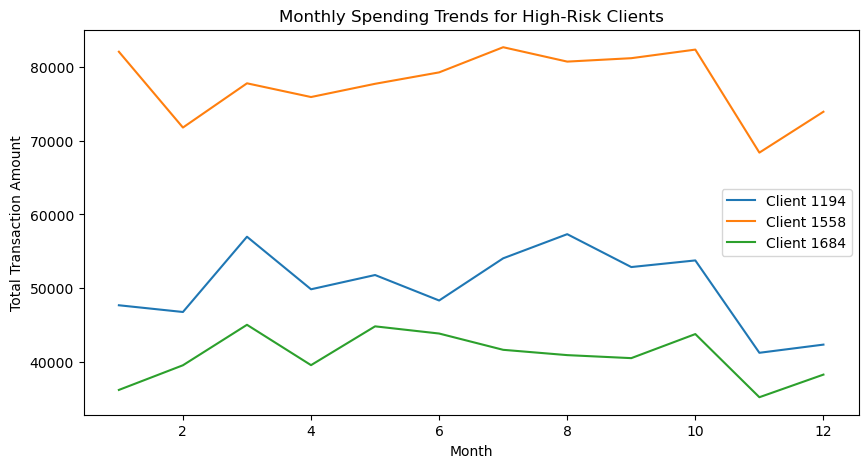

In [94]:
plt.figure(figsize=(10, 5))
for client in high_risk_clients:
    plt.plot(spending_trends.columns, spending_trends.loc[client], label=f"Client {client}")

plt.xlabel("Month")
plt.ylabel("Total Transaction Amount")
plt.title("Monthly Spending Trends for High-Risk Clients")
plt.legend()